**Лабораторный практикум 6. Параллельный перенос и поворот координатных осей на плоскости.**

Загрузка необходимых библиотек.

In [347]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from sympy.solvers.solveset import linsolve

**Упражнение 6.1. Координаты точки М в старой системе координат ($2\sqrt {3}$, $-\sqrt {3}$) . Найти координаты этой точки в новой системе, если начало координат старой системы перенесено в точку (–1, –2), а оси повернуты на 30°. Сделать проверку.**

In [360]:
# начало координат новой системы: (a, b)
# координаты точки M в старой системе: (x, y)
# угол поворота новой системы: alfa

a = -1; b = -2
x = 2*np.sqrt(3); y = -np.sqrt(3); alfa = np.pi/6 

qx, qy = sp.symbols('qx, qy')
ans = (linsolve([qx*np.cos(alfa) - qy*np.sin(alfa)+a-x, qx * np.sin(alfa) + qy * np.cos(alfa)+b-y], (qx, qy)))
print("Координаты этой точки в новой системе:", *ans)

x1 = x * np.cos(alfa) - y * np.sin(alfa) + a
y1 = x * np.sin(alfa) + y * np.cos(alfa) + b

print("Координаты перенесённой точки M в новой системе:", x1, y1)

Координаты этой точки в новой системе: (4.0, -2.0)
Координаты перенесённой точки M в новой системе: 2.8660254037844384 -1.767949192431123


Проверка: True True


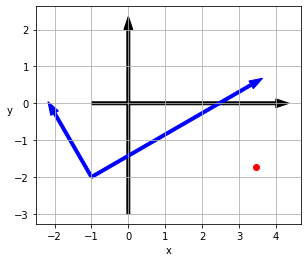

In [349]:
x_new = 4
y_new = -2

# проверка
x_proverka = x_new * np.cos(alfa) - y_new * np.sin(alfa) + a
y_proverka = x_new * np.sin(alfa) + y_new * np.cos(alfa) + b

print("Проверка:", np.isclose(x, x_proverka), np.isclose(y, y_proverka))

plt.arrow(-1, 0, 5, 0, width=0.08, color="black")
plt.arrow(0, -3, 0, 5, width=0.08, color="black")

x3 = np.cos(-alfa); y3 = -np.sin(-alfa)
x4 = np.sin(-alfa); y4 = np.cos(-alfa)

plt.arrow(a, b, x3*5, y3*5, width=0.08, color="blue")
plt.arrow(a, b, x4*2, y4*2, width=0.08, color="blue")

plt.plot(x, y, "or")

plt.xlabel("x"); plt.ylabel("y", rotation = 0)
plt.axis("scaled")
plt.grid()
plt.show()

**Упражнение 6.2. Произвести сдвиг начала координат в точку $(3,2)$ и поворот графика функции $y=2x-4$ относительно начала координат на $45°$ против часовой стрелки. Найти уравнение полученной прямой и координаты точки $М(1,–2)$. Изобразить прямые и точки на графике.**

In [350]:
O=[3,2]
alfa=np.pi/4
M=[1,-2]

a = O[0]; b = O[1]
x = M[0]; y = M[1]

x1 = x * np.cos(alfa) - y * np.sin(alfa) + a
y1 = x * np.sin(alfa) + y * np.cos(alfa) + b

print("Координаты перенесённой точки M в новой системе:", x1, y1)

Координаты перенесённой точки M в новой системе: 5.121320343559643 1.2928932188134525


In [351]:
#точка на графике 2x-4 для построения прямой через неё и M1
M2=[2,0]
x = M2[0]; y = M2[1]
x2 = x * np.cos(alfa) - y * np.sin(alfa) + a
y2 = x * np.sin(alfa) + y * np.cos(alfa) + b

L = sp.Line(sp.Point(x1,y1), sp.Point(x2,y2))
print("Уравнение перенесённой прямой:", L.equation())

Уравнение перенесённой прямой: -53033008588991*x/25000000000000 - 14142135623731*y/20000000000000 + 117781745930520055818003360271/10000000000000000000000000000


In [352]:
x, y = sp.symbols('x, y')
print("Выраженный y: y=",*sp.solve(-53033008588991*x/25000000000000 - 14142135623731*y/20000000000000 + 117781745930520055818003360271/10000000000000000000000000000, y))

Выраженный y: y= 16.6568542494923 - 2.99999999999999*x


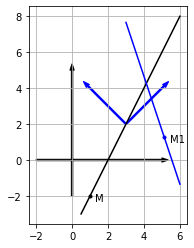

In [353]:
# точки M и M1
plt.plot(M[0],M[1],'.k')
plt.text(M[0] + 0.3, M[1] - 0.3, 'M')
plt.plot(x1,y1,'.b')
plt.text(x1 + 0.3, y1 - 0.3, 'M1')

# начальная система координат
plt.arrow(-2, 0, 7, 0, width=0.08, color='black')
plt.arrow(0, -2, 0, 7, width=0.08, color='black')

x = np.linspace(0.5, 6, 100)
plt.plot(x, 2*x-4,'k')

# новая система координат
x3 = np.cos(-alfa); y3 = - np.sin(-alfa)
x4 = np.sin(-alfa); y4 = np.cos(-alfa)
plt.arrow(O[0], O[1], x3*3, y3*3, width=0.08, color='blue')
plt.arrow(O[0], O[1], x4*3, y4*3, width=0.08, color='blue')

x = np.linspace(3, 6, 100)
plt.plot(x,16.6568542494923 - 2.99999999999999*x,'b')

plt.axis('scaled')
plt.grid()
plt.show()

**Упражнение 6.3. Найти координаты точки $М(1,–2)$ из упражнений 6.1 и 6.2, используя матричные выражения.**

In [369]:
# 6.1
alfa = np.pi / 6
A = np.matrix([[np.cos(alfa), -np.sin(alfa)], [np.sin(alfa), np.cos(alfa)]])
x = [1]
y = [-2]
X = np.concatenate(([x], [y]), axis=0) # соединение массивов
Y = A * X
print("6.1:", Y[0]-1, Y[1]-2)

# 6.2
alfa = np.pi / 4
A = np.matrix([[np.cos(alfa), -np.sin(alfa)], [np.sin(alfa), np.cos(alfa)]])
x = [1]
y = [-2]
X = np.concatenate(([x], [y]), axis=0) # соединение массивов
Y = A * X
print("6.2:", Y[0]+3, Y[1]+2)

6.1: [[0.8660254]] [[-3.23205081]]
6.2: [[5.12132034]] [[1.29289322]]


**Упражнение 6.4. Дан квадрат $ABCD$, где $A(2,2)$, $В(4,2)$, $С(2,4)$, $D(4,4)$. Произведите сдвиг и поворот данного квадрата. Их величины задайте самостоятельно. Изобразите старую и новую системы координат.**

In [354]:
A = [2, 2]
B = [4, 2]
D = [4, 4]
C = [2, 4]

AB = sp.Line(A, B)
BD = sp.Line(B, D)
DC = sp.Line(D, C)
CA = sp.Line(C, A)

print("AB:", AB.equation())
print("BD:", BD.equation())
print("DC:", DC.equation())
print("CA:", CA.equation())

AB: y - 2
BD: x - 4
DC: y - 4
CA: x - 2


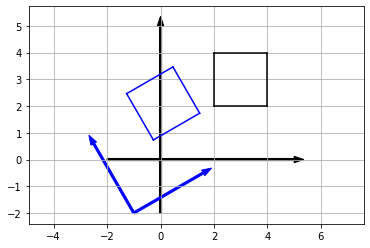

In [355]:
# ЗАДАВАЕМЫЕ ПАРАМЕТРЫ
# начало координат новой системы: (a, b)
# угол поворота новой системы: alfa
alfa = np.pi/6
a = -1; b = -2

def getNewCoord(x, y, alfa, a, b):
    x1 = x * np.cos(alfa) - y * np.sin(alfa) + a
    y1 = x * np.sin(alfa) + y * np.cos(alfa) + b
    return [x1, y1]

A_new = getNewCoord(A[0], A[1], alfa, a, b)
B_new = getNewCoord(B[0], B[1], alfa, a, b)
D_new = getNewCoord(D[0], D[1], alfa, a, b)
C_new = getNewCoord(C[0], C[1], alfa, a, b)

# начальная система координат
plt.arrow(-2, 0, 7, 0, width=0.08, color='black')
plt.arrow(0, -2, 0, 7, width=0.08, color='black')

x = np.linspace(2, 4, 30)
plt.plot(x, 0*x+2, color = "black")
plt.plot(x, 0*x+4, color = "black")

y = np.linspace(2, 4, 30)
plt.plot(0*y+2, y, color = "black")
plt.plot(0*y+4, y, color = "black")

# новая система координат
x3 = np.cos(-alfa); y3 = - np.sin(-alfa)
x4 = np.sin(-alfa); y4 = np.cos(-alfa)
plt.arrow(a, b, x3*3, y3*3, width=0.08, color='blue')
plt.arrow(a, b, x4*3, y4*3, width=0.08, color='blue')

plt.plot([A_new[0], B_new[0]], [A_new[1], B_new[1]], color = "blue")
plt.plot([B_new[0], D_new[0]], [B_new[1], D_new[1]], color = "blue")
plt.plot([D_new[0], C_new[0]], [D_new[1], C_new[1]], color = "blue")
plt.plot([C_new[0], A_new[0]], [C_new[1], A_new[1]], color = "blue")

plt.grid()
plt.axis("equal")
plt.show()